<h1>Dados de casas para alugar</h1>

<img src="img/banner.jpg">

- city : Cidade onde o imóvel está localizada / City where the property is located
- area : Area do imovel / Property area
- rooms : Numero de quartos/ Quantity of rooms
- bathroom : Numero de banheiros / Quantity of bathroom
- parking spaces : Numero de vagas / Quantity of parking spaces
- floor : Andar / Floor
- animal : Aceita animais? / Acept animals?
- furniture : Mobilhada? / Furniture?
- hoa : Valor do condominio / Homeowners association tax
- rent amount : Valor do Aluguel / Rent amount
- total : Valor total / Total
- property tax : IPTU / Property tax
- fire insurance : Seguro Incendio / Fire Insurance

<h3>É Possível prever o valor de uma casa?</h3>

Hoje, No Notebook reporter!

<h3>Carregando os dados</h3>

Importando as bibliotecas que vou utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Importando o dataset

In [2]:
df = pd.read_csv('houses_to_rent.csv')

Visualizando as primeiras linhas do dataset e suas informações

In [3]:
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
Unnamed: 0        6080 non-null int64
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null object
animal            6080 non-null object
furniture         6080 non-null object
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


<h3>Limpeza dos dados</h3>

Removendo as palavras Sem info e Incluso das colunas hoa e property tax.

In [5]:
df['hoa'] = df['hoa'].replace('Sem info','0')
df['hoa'] = df['hoa'].replace('Incluso','0')
df['property tax'] = df['property tax'].replace('Sem info','0')
df['property tax'] = df['property tax'].replace('Incluso','0')

Removendo o R$ e a vírgula das colunas.

In [6]:
df['total'] = df['total'].apply(lambda x: x.replace('R$',''))
df['total'] = df['total'].apply(lambda x: x.replace(',',''))

In [7]:
df['fire insurance'] = df['fire insurance'].apply(lambda x: x.replace('R$',''))
df['fire insurance'] = df['fire insurance'].apply(lambda x: x.replace(',',''))

In [8]:
df['property tax'] = df['property tax'].apply(lambda x: x.replace('R$',''))
df['property tax'] = df['property tax'].apply(lambda x: x.replace(',',''))

In [9]:
df['rent amount'] = df['rent amount'].apply(lambda x: x.replace('R$',''))
df['rent amount'] = df['rent amount'].apply(lambda x: x.replace(',',''))

In [10]:
df['hoa'] = df['hoa'].apply(lambda x: x.replace('R$',''))
df['hoa'] = df['hoa'].apply(lambda x: x.replace(',',''))

Fazendo a conversão de objeto para float.

In [11]:
df['total'] = pd.to_numeric(df['total']).astype(float)
df['property tax'] = pd.to_numeric(df['property tax']).astype(float)
df['hoa'] = pd.to_numeric(df['hoa']).astype(float)
df['rent amount'] = pd.to_numeric(df['rent amount']).astype(float)
df['fire insurance'] = pd.to_numeric(df['fire insurance']).astype(float)

A coluna Unnamed: 0 não nos diz muita coisa, ela apenas repete o index

In [12]:
df.drop(columns='Unnamed: 0',inplace=True)

Exibindo o dataframe com os dados corrigidos.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null object
animal            6080 non-null object
furniture         6080 non-null object
hoa               6080 non-null float64
rent amount       6080 non-null float64
property tax      6080 non-null float64
fire insurance    6080 non-null float64
total             6080 non-null float64
dtypes: float64(5), int64(5), object(3)
memory usage: 617.6+ KB


<h3>Verificando a existencia de outliers</h3>

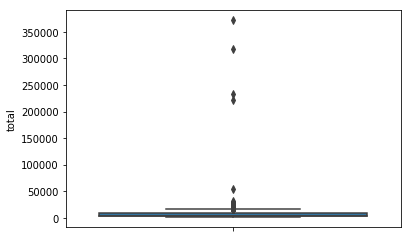

In [14]:
sns.boxplot(y='total', data=df)
plt.show()

No gráfico acima podemos observar vários valores acima de 50.000R$, vamos seleciona-los para verificar se são dados com erro de digitação. <br>(Ou mansões com valores absurdos.)

In [15]:
df[df['total'] > 50000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1269,1,340,5,4,2,7,acept,not furnished,220000.0,12000.0,1000.0,153.0,233200.0
2611,1,42,1,2,1,6,not acept,not furnished,690.0,2500.0,313700.0,32.0,316900.0
3303,1,285,4,5,4,6,acept,furnished,200000.0,20000.0,1834.0,254.0,222100.0
3381,1,700,4,7,8,-,acept,not furnished,0.0,45000.0,8750.0,677.0,54430.0
5627,1,93,3,3,0,16,not acept,furnished,1221.0,5100.0,366300.0,65.0,372700.0


Analisando o dataframe, a única casa onde o valor total faz sentido é a da linha 3381, pelo jeito as outras possuem erro de digitação na hora de inserir o Valor do condominio e IPTU. <br>(não são mansões com valores absurdos!)

In [16]:
df.drop([1269,2611,3303,5627], inplace=True)

<h3>Análise dos dados</h3>

Vamos a uma das informações mais importantes desse dataset, sim, os animais de estimação!<br>
Há mais ou menos apartamentos que aceitam pets?

In [17]:
aceita_pet = df[df['floor'] != '-']

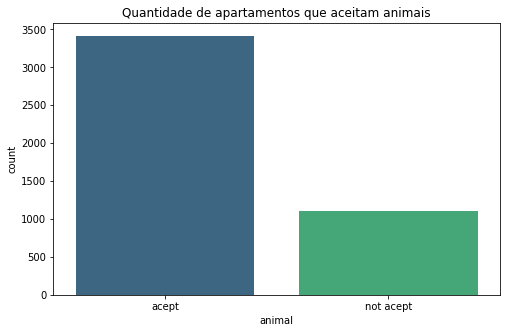

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(aceita_pet['animal'],palette='viridis')
plt.title('Quantidade de apartamentos que aceitam animais')
plt.show()

Uffa! De acordo com o grafico, a maior parte dos Locadores não ve problema com animais em apartamentos

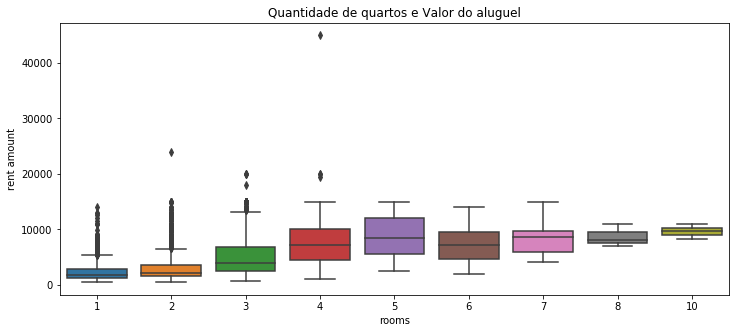

In [19]:
plt.figure(figsize=(12,5))
sns.boxplot(x='rooms',y='rent amount',data=df)
plt.title('Quantidade de quartos e Valor do aluguel')
plt.show()

No gáfico acima, podemos ver a distribuição de valores separando pela quantidade de quartos

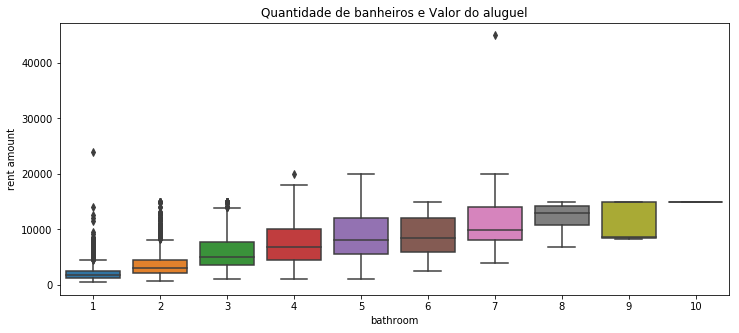

In [20]:
plt.figure(figsize=(12,5))
sns.boxplot(x='bathroom',y='rent amount',data=df)
plt.title('Quantidade de banheiros e Valor do aluguel')
plt.show()

E neste, a distribuição de valores de acordo com a quantidade de banheiros

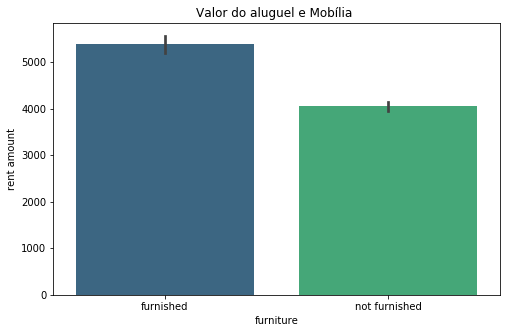

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(y='rent amount',x='furniture',data=df,palette='viridis')
plt.title('Valor do aluguel e Mobília ')
plt.show()

Diferença entre valores de residencias mobiliadas e não mobiliadas

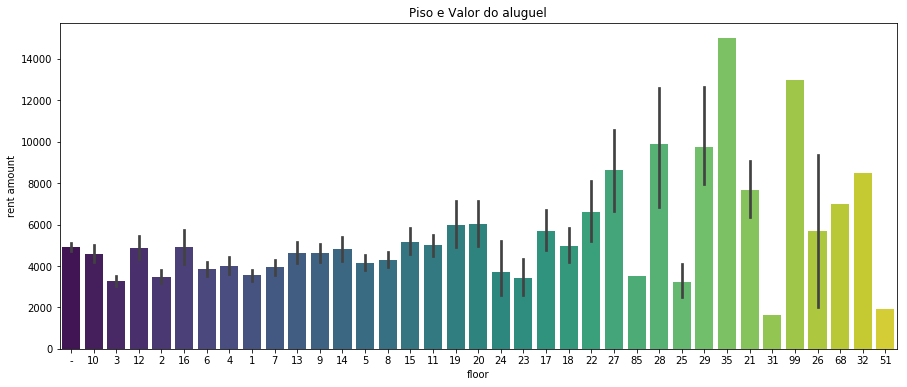

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x='floor',y='rent amount',data=df,palette='viridis')
plt.title('Piso e Valor do aluguel')
plt.show()

O gráfico mostra a média de valores por andar

<h3>Relação entre os dados</h3>

In [23]:
df_select = df[['hoa','rent amount','property tax','fire insurance']]

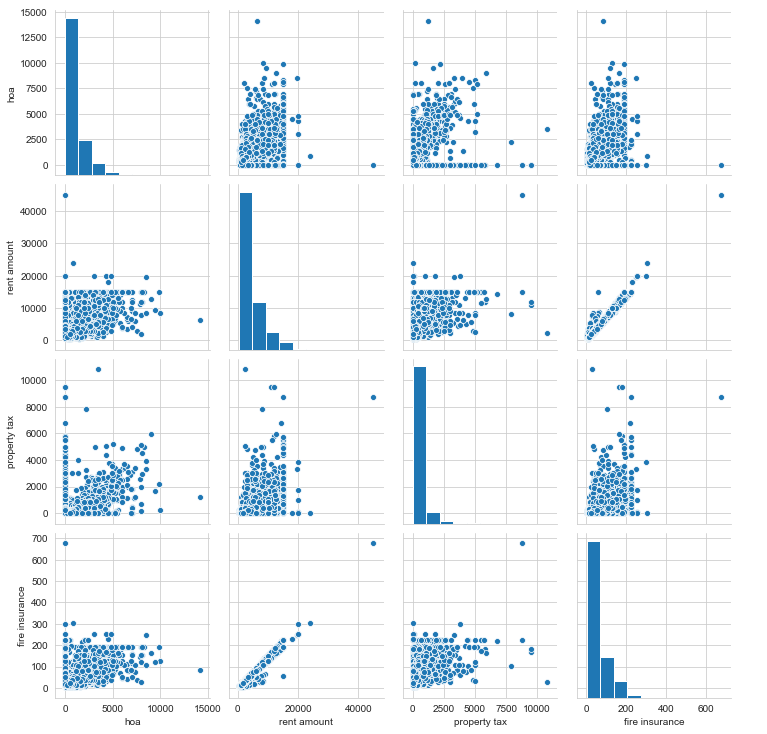

In [24]:
sns.set_palette='viridis'
sns.set_style('whitegrid')
sns.pairplot(df_select)
plt.show()

Podemos ver que tem uma grande relação entre o fire insurance e rent amount

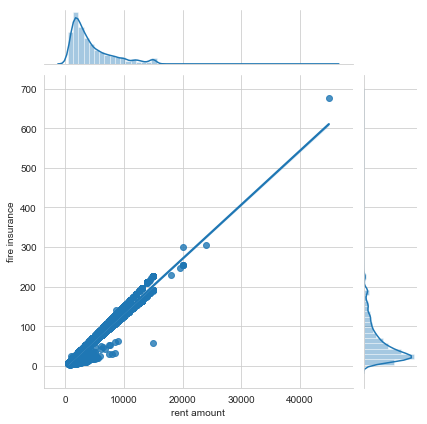

In [25]:
sns.jointplot(x='rent amount',y='fire insurance',data=df_select,kind='reg')
plt.show()

Observando apenas a relação entre rent amount e fire insurance

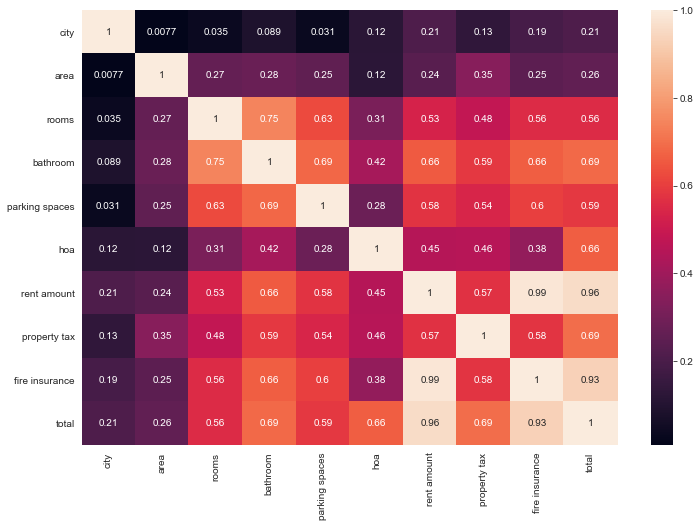

In [26]:
correlacao = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlacao,annot=True)
plt.show()

Acima, é possível observar que rent amount x fire insurance tem uma correlação muito forte

<h1>O Modelo</h1>

No modelo abaixo vamos prever o valor do aluguel das casas

In [27]:
x = df[['hoa','property tax','fire insurance']]
y = df['rent amount']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [30]:
lm = LinearRegression()

In [31]:
#Treina o modelo
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print(lm.intercept_)

55.52043480156772


In [33]:
coefs = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficientes'])
coefs

,Coeficientes
hoa,0.325987
property tax,-0.185389
fire insurance,69.984883


In [34]:
predict = lm.predict(x_test)
predict

array([ 7730.08407959,  4324.59831844,  1102.89511353, ...,
       13684.68304064,   965.3239182 , 13845.10996748])

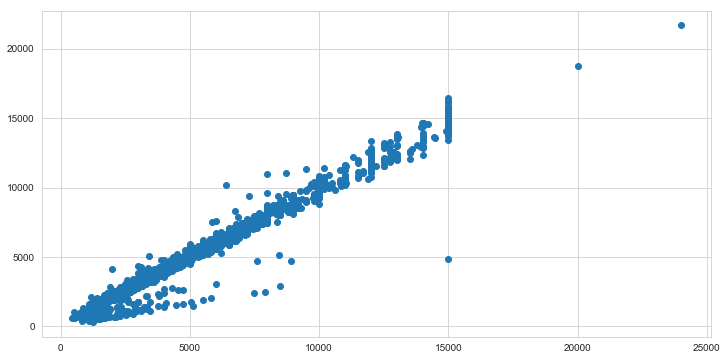

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predict)
plt.show()

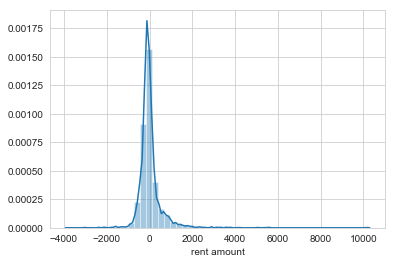

In [36]:
sns.distplot(y_test-predict)

In [37]:
from sklearn.metrics import r2_score

In [38]:
#Função de pontuação da regressão, quanto mais proximo de 1 melhor
score = r2_score(y_test,predict)
print(score)

0.9759410229896969


In [39]:
from sklearn import metrics

In [40]:
#A média dos erros quando o modelo erra é:
print('MAE: ', metrics.mean_absolute_error(y_test,predict))

MAE:  302.42451744696587


In [41]:
#A media dos erros quadratica
print('MSE: ', metrics.mean_squared_error(y_test,predict))

MSE:  316547.51741581823


In [42]:
#Raiz Quadrada do Erro Quadrático Médio
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predict)))

RMSE:  562.6255570233352
